## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

----------------------

## Import data

### Brief Explanation of the dataset's abbreviated variables
Attributes related with Eating Habits: <br>
FAVC: Frequent consumption of high caloric food <br>
FCVC: Frequency of consumption of vegetables <br>
NCP: Number of main meals<br>
CAEC: Consumption of food between meals<br>
CH2O: Consumption of water daily<br>
CALC: Consumption of alcohol<br>

Class variable NObeyesdad was created based on Equation (Mass Body Index = Weight/height*height) with the values of: <br> Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, 

In [3]:
obesity_data = pd.read_csv("datasets/ObesityDataSet_raw_and_data_sinthetic.csv")
pd.concat([obesity_data.head(), obesity_data.tail()])

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
#check for missing data
obesity_data.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

-----------
## EDA on the data

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

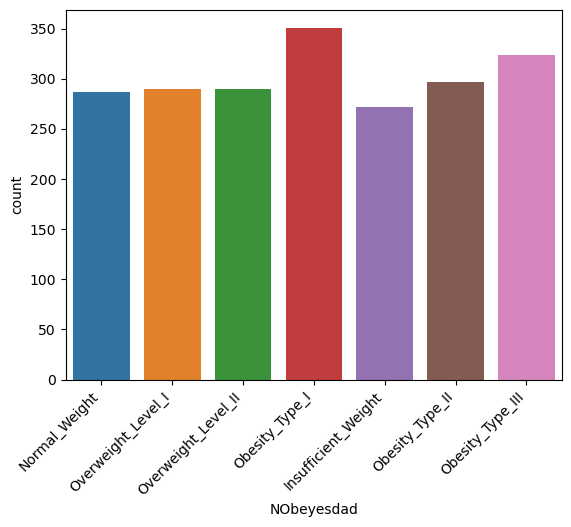

In [5]:
sb.countplot(x='NObeyesdad', data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

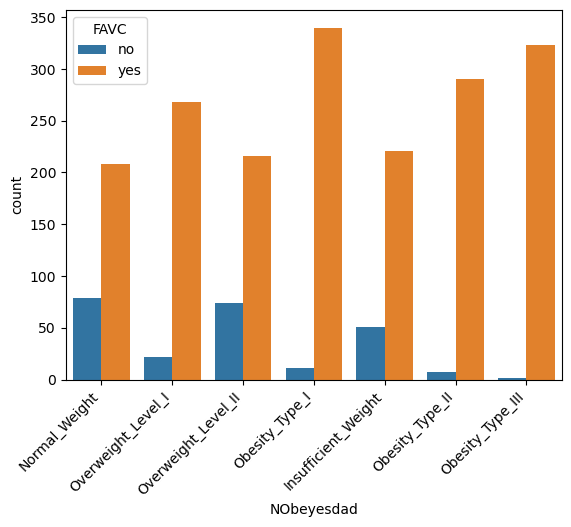

In [6]:
sb.countplot(x='NObeyesdad', hue='FAVC', data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

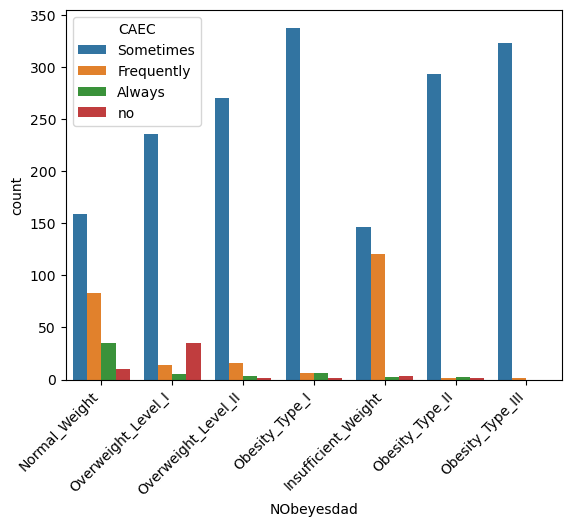

In [7]:
sb.countplot(x='NObeyesdad', hue='CAEC', data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

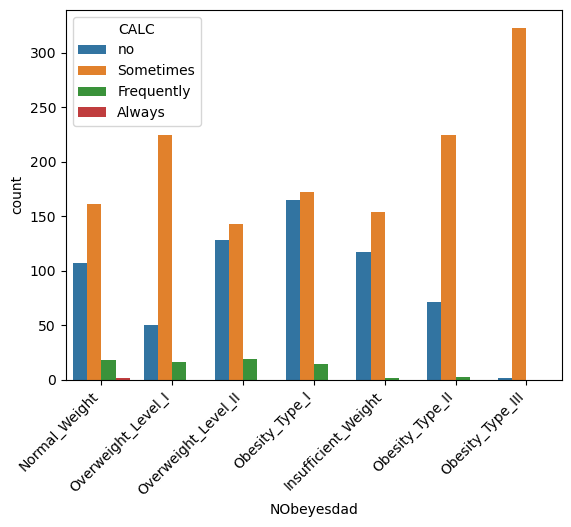

In [8]:
sb.countplot(x='NObeyesdad', hue='CALC', data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

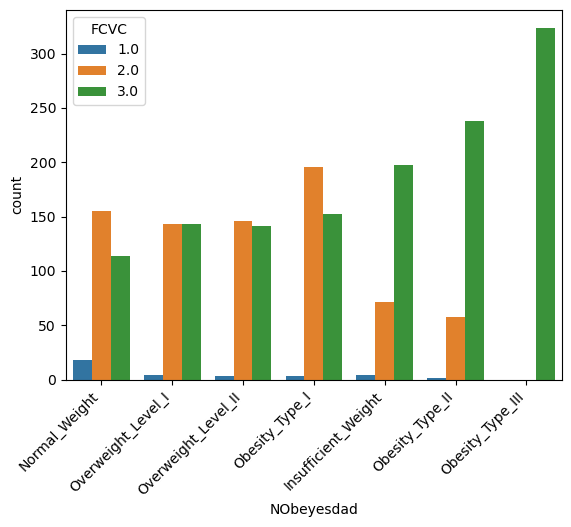

In [9]:
sb.countplot(x='NObeyesdad', hue=obesity_data['FCVC'].apply(np.ceil), data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

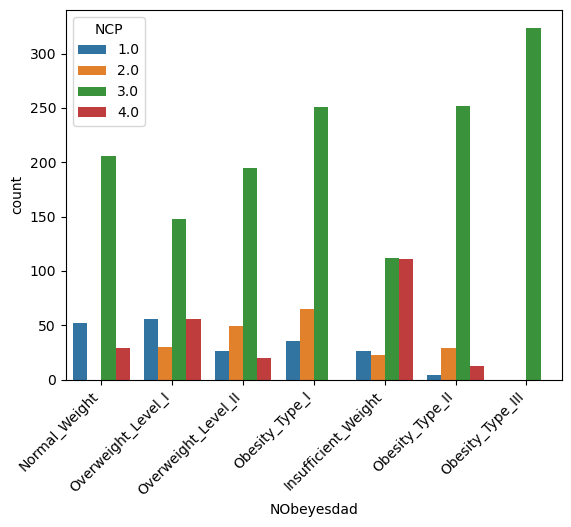

In [10]:
sb.countplot(x='NObeyesdad', hue=obesity_data['NCP'].apply(np.ceil), data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

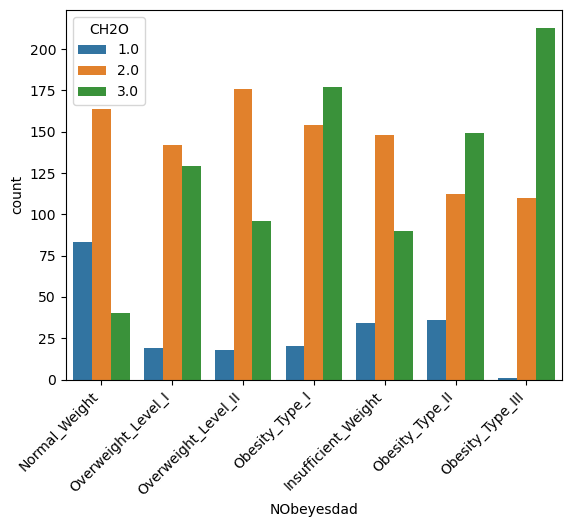

In [11]:
sb.countplot(x='NObeyesdad', hue=obesity_data['CH2O'].apply(np.ceil), data=obesity_data)
plt.xticks(rotation=45, ha='right')

--------------
## Focusing on `Eating Habits` only

#### Cleaning the data

In [12]:
focusObesity_data = obesity_data[['FAVC', 'FCVC', 'NCP','CAEC','CH2O', 'CALC']].copy()

In [13]:
#view cleaned data
focusObesity_data

,FAVC,FCVC,NCP,CAEC,CH2O,CALC
0,no,2.0,3.0,Sometimes,2.000000,no
1,no,3.0,3.0,Sometimes,3.000000,Sometimes
2,no,2.0,3.0,Sometimes,2.000000,Frequently
3,no,3.0,3.0,Sometimes,2.000000,Frequently
4,no,2.0,1.0,Sometimes,2.000000,Sometimes
...,...,...,...,...,...,...
2106,yes,3.0,3.0,Sometimes,1.728139,Sometimes
2107,yes,3.0,3.0,Sometimes,2.005130,Sometimes
2108,yes,3.0,3.0,Sometimes,2.054193,Sometimes
2109,yes,3.0,3.0,Sometimes,2.852339,Sometimes


#### Changing categorical data into dummies
As ML Algorithm cannot work directly with categorical data.

Dummy Variables are binary variables.

In Logistic Regression, dummy variables are useful as they allow us to compare the effect of each category on the outcome variable while controlling for the effects of other variables in the model.

In [14]:
#Reusable function 
def get_dummies_and_drop(df, column):
    dummies = pd.get_dummies(df, columns=[column], drop_first=True)
    df.drop(column, axis=1, inplace=True)
    df = pd.concat([dummies], axis=1)
    return df

In [15]:
focusObesity_data = get_dummies_and_drop(focusObesity_data, 'FAVC')


In [16]:
focusObesity_data = get_dummies_and_drop(focusObesity_data, 'CAEC')

In [17]:
focusObesity_data = get_dummies_and_drop(focusObesity_data, 'CALC')

In [18]:
#display the current df
focusObesity_data

,FCVC,NCP,CH2O,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,2.0,3.0,2.000000,0,0,1,0,0,0,1
1,3.0,3.0,3.000000,0,0,1,0,0,1,0
2,2.0,3.0,2.000000,0,0,1,0,1,0,0
3,3.0,3.0,2.000000,0,0,1,0,1,0,0
4,2.0,1.0,2.000000,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2106,3.0,3.0,1.728139,1,0,1,0,0,1,0
2107,3.0,3.0,2.005130,1,0,1,0,0,1,0
2108,3.0,3.0,2.054193,1,0,1,0,0,1,0
2109,3.0,3.0,2.852339,1,0,1,0,0,1,0


--------------
#### Splitting Data into Predictor and Response Variables
Splitting data into independent(X) [predictor] and dependent(Y) [response] variables

In [19]:
""" 
#X: focusObesity_data consists of attributes related to eating habits
FCVC
NCP	
CH2O
FAVC_yes
CAEC_Frequently
CAEC_Sometimes
CAEC_no
CALC_Frequently
CALC_Sometimes
CALC_no
"""
X = focusObesity_data 

y = obesity_data.loc[:,'NObeyesdad'] # 

#### Feature Scaling
To normalize the range of independent variables to enable it to be in the same range. 

With the current dataset (which is a large dataset), scaling will help to improve the performance of the model

In [20]:

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.7850187 ,  0.40415272, -0.01307326, ..., -0.18519426,
        -1.40472041,  1.5177613 ],
       [ 1.08834176,  0.40415272,  1.61875854, ..., -0.18519426,
         0.71188543, -0.65886513],
       [-0.7850187 ,  0.40415272, -0.01307326, ...,  5.39973544,
        -1.40472041, -0.65886513],
       ...,
       [ 1.08834176,  0.40415272,  0.0753606 , ..., -0.18519426,
         0.71188543, -0.65886513],
       [ 1.08834176,  0.40415272,  1.37780063, ..., -0.18519426,
         0.71188543, -0.65886513],
       [ 1.08834176,  0.40415272,  1.39603472, ..., -0.18519426,
         0.71188543, -0.65886513]])

#### Splitting dataset into Train and Test Sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Check the sample sizes
print("Train Set :", "X:",X_train.shape, "y:", y_train.shape)
print("Test Set  :", "X:", X_test.shape, "y:", y_test.shape)

Train Set : X: (1477, 10) y: (1477,)
Test Set  : X: (634, 10) y: (634,)


----------
#### Logistic Regression 

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = logreg.predict(X_test)

In [24]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
553,Insufficient_Weight,Obesity_Type_II
331,Normal_Weight,Obesity_Type_I
241,Overweight_Level_I,Obesity_Type_II
1957,Obesity_Type_III,Obesity_Type_III
1691,Obesity_Type_II,Obesity_Type_II
...,...,...
1012,Overweight_Level_II,Overweight_Level_II
340,Normal_Weight,Obesity_Type_II
2005,Obesity_Type_III,Obesity_Type_III
1671,Obesity_Type_II,Obesity_Type_II


In [25]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[35, 11, 20, 14,  7,  3,  2],
       [21, 17, 12, 12,  3,  2, 10],
       [ 1,  6, 66, 25,  9,  2,  5],
       [ 0,  2, 24, 52,  7,  0,  0],
       [ 0,  0,  0,  0, 91,  0,  1],
       [ 5,  6, 21, 28,  5, 15,  9],
       [ 4,  3, 45,  9,  1,  3, 20]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

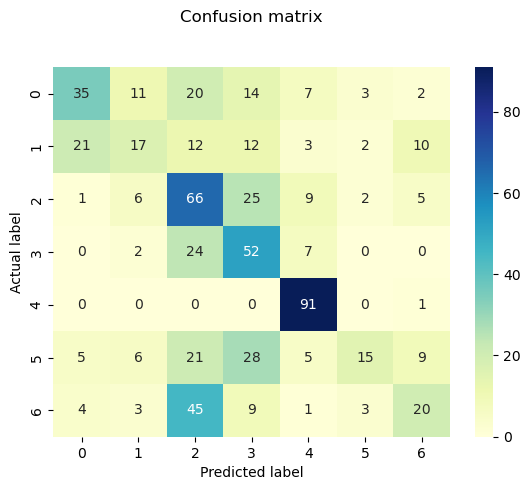

In [26]:
sb.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
target_names = ['Normal Weight', 'Overweight Level I', 'Overweight Level II','Obesity Type I','Insufficient Weight','Obesity Type II','Obesity Type III']
print(classification_report(y_test, y_pred,target_names=target_names))

                     precision    recall  f1-score   support

      Normal Weight       0.53      0.38      0.44        92
 Overweight Level I       0.38      0.22      0.28        77
Overweight Level II       0.35      0.58      0.44       114
     Obesity Type I       0.37      0.61      0.46        85
Insufficient Weight       0.74      0.99      0.85        92
    Obesity Type II       0.60      0.17      0.26        89
   Obesity Type III       0.43      0.24      0.30        85

           accuracy                           0.47       634
          macro avg       0.49      0.45      0.43       634
       weighted avg       0.48      0.47      0.44       634



In [28]:
acc_score_eating = accuracy_score(y_test,y_pred)
print("Accuracy Score for Eating Habits:", acc_score_eating)

Accuracy Score for Eating Habits: 0.4668769716088328


### An accuracy score of `0.46687` means that the model is able to predict the outcome correctly only `46.69% of the time.` In other words, the model is not performing well and needs improvement. It could be due to various reasons such as insufficient data, inappropriate feature selection, or lack of complexity in the model.

-----------
## Enhancing Model Performance: Insights and Recommendations

#### Brief Explanation of the dataset's abbreviated variables
Attributes related with `Eating Habits`: <br>
FAVC: Frequent consumption of high caloric food <br>
FCVC: Frequency of consumption of vegetables <br>
NCP: Number of main meals<br>
CAEC: Consumption of food between meals<br>
CH2O: Consumption of water daily<br>
CALC: Consumption of alcohol<br>

Attributes related with `Physical Conditions`: <br>
SCC: Calories consumption monitoring<br>
FAF: Physical activity frequency<br>
TUE: Time using technology devices<br>
MTRANS: Transportation used<br>


`Physical Characteristic` obtained were: Gender, Age, Height, Weight and family_history_with_overweight. <br>



Class variable NObeyesdad was created based on Equation (Mass Body Index = Weight/height*height) with the values of: <br> 
Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, 

----------
### Focusing on `Physical Attribtutes` only

In [29]:
focusObesity_data_unexplored_Physical = obesity_data.copy()

In [30]:
focusObesity_data_unexplored_Physical = obesity_data[['SCC', 'FAF', 'TUE','MTRANS']].copy()

In [31]:
focusObesity_data_unexplored_Physical

,SCC,FAF,TUE,MTRANS
0,no,0.000000,1.000000,Public_Transportation
1,yes,3.000000,0.000000,Public_Transportation
2,no,2.000000,1.000000,Public_Transportation
3,no,2.000000,0.000000,Walking
4,no,0.000000,0.000000,Public_Transportation
...,...,...,...,...
2106,no,1.676269,0.906247,Public_Transportation
2107,no,1.341390,0.599270,Public_Transportation
2108,no,1.414209,0.646288,Public_Transportation
2109,no,1.139107,0.586035,Public_Transportation


In [32]:
focusObesity_data_unexplored_Physical = get_dummies_and_drop(focusObesity_data_unexplored_Physical, 'SCC')

In [33]:
focusObesity_data_unexplored_Physical

,FAF,TUE,MTRANS,SCC_yes
0,0.000000,1.000000,Public_Transportation,0
1,3.000000,0.000000,Public_Transportation,1
2,2.000000,1.000000,Public_Transportation,0
3,2.000000,0.000000,Walking,0
4,0.000000,0.000000,Public_Transportation,0
...,...,...,...,...
2106,1.676269,0.906247,Public_Transportation,0
2107,1.341390,0.599270,Public_Transportation,0
2108,1.414209,0.646288,Public_Transportation,0
2109,1.139107,0.586035,Public_Transportation,0


In [34]:
focusObesity_data_unexplored_Physical = get_dummies_and_drop(focusObesity_data_unexplored_Physical, 'MTRANS')

In [35]:
focusObesity_data_unexplored_Physical

,FAF,TUE,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.000000,1.000000,0,0,0,1,0
1,3.000000,0.000000,1,0,0,1,0
2,2.000000,1.000000,0,0,0,1,0
3,2.000000,0.000000,0,0,0,0,1
4,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...
2106,1.676269,0.906247,0,0,0,1,0
2107,1.341390,0.599270,0,0,0,1,0
2108,1.414209,0.646288,0,0,0,1,0
2109,1.139107,0.586035,0,0,0,1,0


--------------
#### Splitting Data into Predictor and Response Variables
Splitting data into independent(X) [predictor] and dependent(Y) [response] variables

In [36]:
""" 
#X: focusObesity_data_unexplored_Physical consists of attributes related to physical habits
SCC: Calories consumption monitoring<br>
FAF: Physical activity frequency<br>
TUE: Time using technology devices<br>
MTRANS: Transportation used<br>
"""
X_p = focusObesity_data_unexplored_Physical 

y_p = obesity_data.loc[:,'NObeyesdad'] # 

#### Feature Scaling
To normalize the range of independent variables to enable it to be in the same range. 

With the current dataset (which is a large dataset), scaling will help to improve the performance of the model

In [37]:
sc = StandardScaler()
X_p = sc.fit_transform(X_p)
X_p

array([[-1.18803911,  0.56199675, -0.21827203, ..., -0.07237469,
         0.57972058, -0.16507758],
       [ 2.33975012, -1.08062463,  4.581439  , ..., -0.07237469,
         0.57972058, -0.16507758],
       [ 1.16382038,  0.56199675, -0.21827203, ..., -0.07237469,
         0.57972058, -0.16507758],
       ...,
       [ 0.47497132, -0.01901815, -0.21827203, ..., -0.07237469,
         0.57972058, -0.16507758],
       [ 0.15147069, -0.11799101, -0.21827203, ..., -0.07237469,
         0.57972058, -0.16507758],
       [ 0.01899633,  0.09243207, -0.21827203, ..., -0.07237469,
         0.57972058, -0.16507758]])

#### Splitting dataset into Train and Test Sets

In [38]:
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p, y_p, test_size=0.30, random_state=1)

# Check the sample sizes
print("Train Set :", "X:",X_p_train.shape, "y:", y_p_train.shape)
print("Test Set  :", "X:", X_p_test.shape, "y:", y_p_test.shape)

Train Set : X: (1477, 7) y: (1477,)
Test Set  : X: (634, 7) y: (634,)


----------
#### Logistic Regression for Physical Attributes

In [39]:
logreg = LogisticRegression()
logreg.fit(X_p_train, y_p_train)

LogisticRegression()

In [40]:
y_p_pred = logreg.predict(X_p_test)

In [41]:
result = pd.DataFrame({'Actual' : y_p_test, 'Predicted' : y_p_pred})
result

,Actual,Predicted
553,Insufficient_Weight,Normal_Weight
331,Normal_Weight,Insufficient_Weight
241,Overweight_Level_I,Normal_Weight
1957,Obesity_Type_III,Obesity_Type_III
1691,Obesity_Type_II,Obesity_Type_I
...,...,...
1012,Overweight_Level_II,Obesity_Type_III
340,Normal_Weight,Obesity_Type_III
2005,Obesity_Type_III,Obesity_Type_III
1671,Obesity_Type_II,Obesity_Type_II


In [42]:
cf_matrix3 = confusion_matrix(y_p_test, y_p_pred)
cf_matrix3

array([[21,  5, 16,  2, 40,  8,  0],
       [ 8, 11,  7,  6, 38,  7,  0],
       [14,  4, 19, 29, 48,  0,  0],
       [ 1,  4, 27, 18, 35,  0,  0],
       [ 3,  5, 18,  1, 65,  0,  0],
       [ 6, 22, 12,  6, 35,  8,  0],
       [13,  3, 24, 18, 26,  1,  0]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

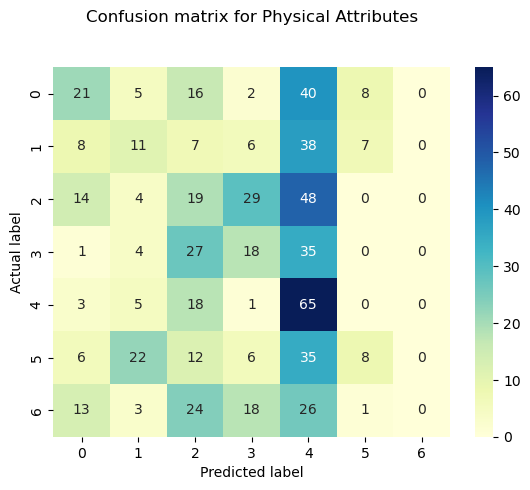

In [83]:
sb.heatmap(pd.DataFrame(cf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix for Physical Attributes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
acc_score_physical = accuracy_score(y_p_test,y_p_pred)
print("Accuracy Score for Physical Attributes:", acc_score_physical)

Accuracy Score for Physical Attributes: 0.22397476340694006


----------
### Focusing on `Personal Characteristic` attribtutes only

In [46]:
focusObesity_data_unexplored_PC = obesity_data.copy()
focusObesity_data_unexplored_PC = obesity_data[['Gender', 'Age', 'Height','Weight', 'family_history_with_overweight']].copy()

In [47]:
focusObesity_data_unexplored_PC

,Gender,Age,Height,Weight,family_history_with_overweight
0,Female,21.000000,1.620000,64.000000,yes
1,Female,21.000000,1.520000,56.000000,yes
2,Male,23.000000,1.800000,77.000000,yes
3,Male,27.000000,1.800000,87.000000,no
4,Male,22.000000,1.780000,89.800000,no
...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes
2107,Female,21.982942,1.748584,133.742943,yes
2108,Female,22.524036,1.752206,133.689352,yes
2109,Female,24.361936,1.739450,133.346641,yes


In [48]:
focusObesity_data_unexplored_PC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
dtypes: float64(3), object(2)
memory usage: 82.6+ KB


In [49]:
focusObesity_data_unexplored_PC = get_dummies_and_drop(focusObesity_data_unexplored_PC, 'Gender')
focusObesity_data_unexplored_PC

,Age,Height,Weight,family_history_with_overweight,Gender_Male
0,21.000000,1.620000,64.000000,yes,0
1,21.000000,1.520000,56.000000,yes,0
2,23.000000,1.800000,77.000000,yes,1
3,27.000000,1.800000,87.000000,no,1
4,22.000000,1.780000,89.800000,no,1
...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,yes,0
2107,21.982942,1.748584,133.742943,yes,0
2108,22.524036,1.752206,133.689352,yes,0
2109,24.361936,1.739450,133.346641,yes,0


In [50]:

focusObesity_data_unexplored_PC = get_dummies_and_drop(focusObesity_data_unexplored_PC, 'family_history_with_overweight')
focusObesity_data_unexplored_PC

,Age,Height,Weight,Gender_Male,family_history_with_overweight_yes
0,21.000000,1.620000,64.000000,0,1
1,21.000000,1.520000,56.000000,0,1
2,23.000000,1.800000,77.000000,1,1
3,27.000000,1.800000,87.000000,1,0
4,22.000000,1.780000,89.800000,1,0
...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,0,1
2107,21.982942,1.748584,133.742943,0,1
2108,22.524036,1.752206,133.689352,0,1
2109,24.361936,1.739450,133.346641,0,1



--------------
#### Splitting Data into Predictor and Response Variables
Splitting data into independent(X) [predictor] and dependent(Y) [response] variables


In [51]:
""" 
#X: focusObesity_data_unexplored_PC consists of Personal Characteristics 
'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight'
"""
X_pc = focusObesity_data_unexplored_PC
y_pc = obesity_data.loc[:,'NObeyesdad'] # 

#### Feature Scaling
To normalize the range of independent variables to enable it to be in the same range. 

With the current dataset (which is a large dataset), scaling will help to improve the performance of the model

In [52]:
sc = StandardScaler()
X_pc = sc.fit_transform(X_pc)
X_pc

array([[-0.52212439, -0.87558934, -0.86255819, -1.01191369,  0.47229133],
       [-0.52212439, -1.94759928, -1.16807699, -1.01191369,  0.47229133],
       [-0.20688898,  1.05402854, -0.36609013,  0.98822657,  0.47229133],
       ...,
       [-0.28190933,  0.54167211,  1.79886776, -1.01191369,  0.47229133],
       [ 0.00777624,  0.40492652,  1.78577968, -1.01191369,  0.47229133],
       [-0.10211908,  0.39834438,  1.7905916 , -1.01191369,  0.47229133]])

#### Splitting dataset into Train and Test Sets


In [53]:
X_pc_train, X_pc_test, y_pc_train, y_pc_test = train_test_split(X_pc, y_pc, test_size=0.30, random_state=1)

# Check the sample sizes
print("Train Set :", "X:",X_pc_train.shape, "y:", y_pc_train.shape)
print("Test Set  :", "X:", X_pc_test.shape, "y:", y_pc_test.shape)

Train Set : X: (1477, 5) y: (1477,)
Test Set  : X: (634, 5) y: (634,)


----------
#### Logistic Regression for Personal Characteristics 

In [54]:

logreg = LogisticRegression()
logreg.fit(X_pc_train, y_pc_train)
y_pc_pred = logreg.predict(X_pc_test)

In [55]:
result = pd.DataFrame({'Actual' : y_pc_test, 'Predicted' : y_pc_pred})
result

,Actual,Predicted
553,Insufficient_Weight,Insufficient_Weight
331,Normal_Weight,Insufficient_Weight
241,Overweight_Level_I,Normal_Weight
1957,Obesity_Type_III,Obesity_Type_III
1691,Obesity_Type_II,Obesity_Type_II
...,...,...
1012,Overweight_Level_II,Obesity_Type_I
340,Normal_Weight,Normal_Weight
2005,Obesity_Type_III,Obesity_Type_III
1671,Obesity_Type_II,Obesity_Type_II


In [56]:
cf_matrix4 = confusion_matrix(y_pc_test, y_pc_pred)
cf_matrix4


array([[ 91,   1,   0,   0,   0,   0,   0],
       [ 10,  55,   0,   0,   0,  11,   1],
       [  0,   0, 104,   6,   0,   1,   3],
       [  0,   0,   0,  85,   0,   0,   0],
       [  0,   0,   0,   0,  92,   0,   0],
       [  0,   3,   0,   0,   0,  68,  18],
       [  0,   0,  12,   0,   0,  16,  57]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

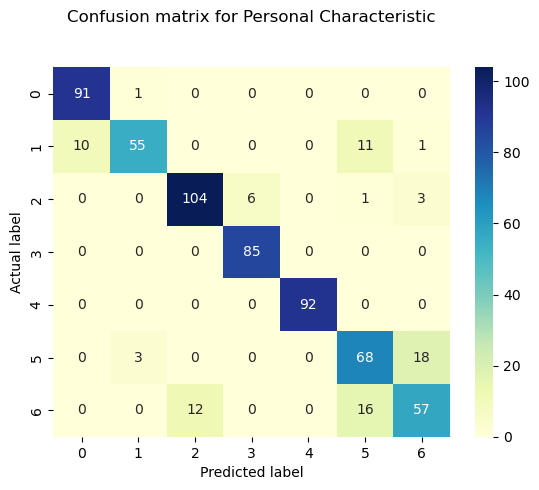

In [82]:
sb.heatmap(pd.DataFrame(cf_matrix4), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix for Personal Characteristic', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [58]:
acc_score_personal= accuracy_score(y_pc_test,y_pc_pred)
print("Accuracy Score for Personal Characteristic:", acc_score_personal)

Accuracy Score for Personal Characteristic: 0.8706624605678234


-----------
### Focusing on `ALL` 
ALL = `Eating Habits, Physical Attributes` and `Personal Characteristic`


In [59]:
focusObesity_data_unexplored = obesity_data.copy()

In [60]:

focusObesity_data_unexplored.drop('NObeyesdad', axis=1, inplace=True)

In [61]:
focusObesity_data_unexplored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [62]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'Gender')


In [63]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'family_history_with_overweight')


In [64]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'FAVC')


In [65]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'CAEC')

In [66]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'SMOKE')

In [67]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'SCC')

In [68]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'CALC')

In [69]:
focusObesity_data_unexplored = get_dummies_and_drop(focusObesity_data_unexplored, 'MTRANS')

In [70]:
focusObesity_data_unexplored

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0,1,...,0,0,0,0,0,1,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0,1,...,0,1,1,0,1,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1,0,...,0,0,0,1,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,1,...,0,0,0,0,1,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,1,...,0,0,0,0,1,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,1,...,0,0,0,0,1,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,1,...,0,0,0,0,1,0,0,0,1,0


In [71]:
z = focusObesity_data_unexplored
r = obesity_data.loc[:,'NObeyesdad'] # 

In [72]:
sc = StandardScaler()
z = sc.fit_transform(z)
z

array([[-0.52212439, -0.87558934, -0.86255819, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.52212439, -1.94759928, -1.16807699, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.20688898,  1.05402854, -0.36609013, ..., -0.07237469,
         0.57972058, -0.16507758],
       ...,
       [-0.28190933,  0.54167211,  1.79886776, ..., -0.07237469,
         0.57972058, -0.16507758],
       [ 0.00777624,  0.40492652,  1.78577968, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.10211908,  0.39834438,  1.7905916 , ..., -0.07237469,
         0.57972058, -0.16507758]])

In [73]:
z_train, z_test, r_train, r_test = train_test_split(z, r, test_size=0.30, random_state=1)

print(z_train.shape)
print(z_test.shape)
print(r_train.shape)
print(r_test.shape)

(1477, 23)
(634, 23)
(1477,)
(634,)


In [74]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(z_train, r_train)

LogisticRegression(max_iter=2000)

In [75]:
r_pred = logreg.predict(z_test)

In [76]:
result = pd.DataFrame({'Actual' : r_test, 'Predicted' : r_pred})
result

,Actual,Predicted
553,Insufficient_Weight,Insufficient_Weight
331,Normal_Weight,Insufficient_Weight
241,Overweight_Level_I,Normal_Weight
1957,Obesity_Type_III,Obesity_Type_III
1691,Obesity_Type_II,Obesity_Type_II
...,...,...
1012,Overweight_Level_II,Overweight_Level_II
340,Normal_Weight,Normal_Weight
2005,Obesity_Type_III,Obesity_Type_III
1671,Obesity_Type_II,Obesity_Type_II


In [77]:
cf_matrix = confusion_matrix(r_test, r_pred)
cf_matrix

array([[90,  2,  0,  0,  0,  0,  0],
       [12, 51,  0,  0,  0, 10,  4],
       [ 0,  0, 98,  9,  1,  1,  5],
       [ 0,  0,  3, 82,  0,  0,  0],
       [ 0,  0,  2,  0, 90,  0,  0],
       [ 0, 11,  0,  0,  0, 64, 14],
       [ 0,  1, 10,  0,  0,  6, 68]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

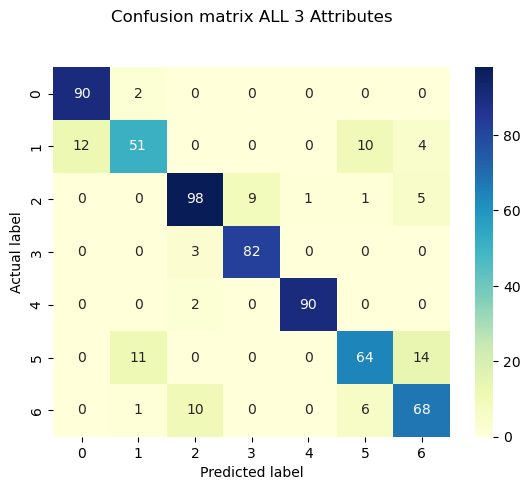

In [84]:
sb.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix ALL 3 Attributes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [85]:
acc_score_all = accuracy_score(r_test,r_pred)
print("accuracy_score for ALL 3 attributes: " , acc_score_all)

accuracy_score for ALL 3 attributes:  0.8564668769716088


---------
### Comparing between the 4 attributes 

1. Eating Habits<br>
2. Physical Attributes<br>
3. Personal Characteristic<br>
4. All 3

In [80]:
print("Rounded up (5 dp) accuracy_score for Eating Habits attributes:" , round(acc_score_eating,5))
print("Rounded up (5 dp) accuracy_score for Physicl attributes:" , round(acc_score_physical,5))
print("Rounded up (5 dp) accuracy_score for personal characteristic attributes:" , round(acc_score_personal,5))
print("Rounded up (5 dp) accuracy_score for All the attributes:" , round(acc_score_all,5))

Rounded up (5 dp) accuracy_score for Eating Habits attributes: 0.46688
Rounded up (5 dp) accuracy_score for Physicl attributes: 0.22397
Rounded up (5 dp) accuracy_score for personal characteristic attributes: 0.87066
Rounded up (5 dp) accuracy_score for All the attributes: 0.85647


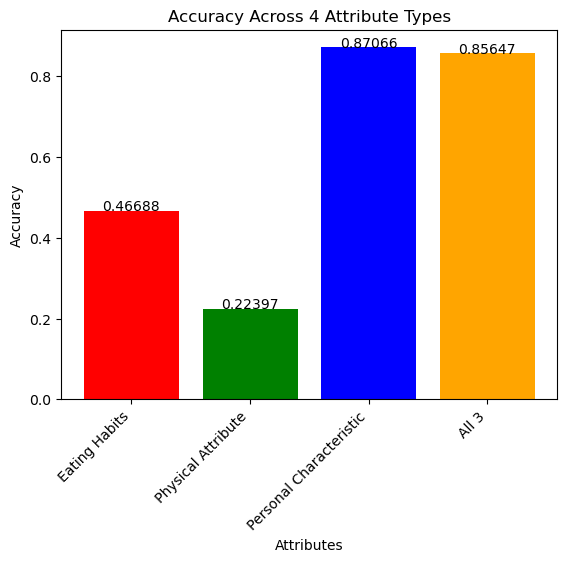

In [98]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
# List of accuracy scores and their corresponding names
scores = [(round(acc_score_eating,5)),  round(acc_score_physical,5), round(acc_score_personal,5), round(acc_score_all,5)]
names = ['Eating Habits', 'Physical Attribute', 'Personal Characteristic', 'All 3']

# Specify the color for each bar
colors = ['red', 'green', 'blue', 'orange']

# Plot bar chart with colors
plt.bar(names, scores, color=colors)
addlabels(names,scores)
plt.title('Accuracy Across 4 Attribute Types')
plt.xlabel('Attributes')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()


### Based on the analysis, it can be observed that the accuracy scores for `Personal Characteristic` with an accuracy score of `0.87066` and `All 3` with an accuracy score of `0.85647` are significantly higher compared to `Eating Habits` and `Physical Attribute`.

### Although the main objective of this analysis was to predict obesity levels based on dietary habits, we found that for the Eating Habits attribute were too low. Therefore, it is more benefical to explore other variables. While Personal Charactertistic has the highest accuracy, it may be biased to solely reply on this attribute. Using all the attributes combined (eating habits, physical attributes and personal characteristic) can lead to a more accurate prediction

-----------------
### Additional ways to improve<BR> ML : Feature Selection

Possible feature selection methods:

CART Regression Feature importance

Permutation feature importance for regression

DTC and RFC feature importance

*Feature selection using Random Forest Importance*